# Inversion and Optimisation <a class="tocSkip"></a>

## Homework Lecture 5: Gradient Based Methods (solutions) <a class="tocSkip"></a>

In [2]:
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt
# font sizes for plots
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

In [3]:
%matplotlib inline

# Newton's method

## Root Finding

Solve the following non-linear equations using Newton's method. Write your own Newton solver or copy some code of the lecture notes.

* $e^x = -x$

### Solution <a class="tocSkip"></a>
We first write it in the standard form $F(x) = 0$ by choosing $F(x) = e^x + x$.
We then use the following code from the lecture notes:

In [4]:
def newton_method(F, jac, x_0, atol = 1.e-5, maxiter=100):
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        Fx = F(x)
        y_n.append(Fx)
        # Chord update:
        x = x - Fx/jac(x)
        if abs(x - x_n[-1]) < atol:
            break
    
    return x_n, y_n

This function requires us to provide the function `F` and `jac` for the derivative of `F`:

In [5]:
def F(x):
    return np.exp(x) + x

def jac(x):
    return  np.exp(x) + 1

For this case, pretty much any initial guess works, so we choose $x_0=0$

In [6]:
x0 = 0.
x_n, y_n = newton_method(F, jac, x0)
print('Solution x_n:', x_n[-1])
print('f(x_n) = ', y_n[-1])

Solution x_n: -0.5671431650348622
f(x_n) =  1.964804717813351e-07


* $F(x)=0$ with $F(x) = x^4 + 2 x^3 - 72 x^2 - 18 x + 567$. How many roots does this nonlinear equation potentially have? Try to find them all by trying different initial guesses in the range $-10 \leq x_0 \leq 10$.

### Solution <a class="tocSkip"></a>
This is a fourth order polynomial, so the maximum number of roots is four. We define the function `F` and `jac` for the derivative of `F`:

In [7]:
def F(x):
    return x**4 + 2*x**3 -72*x**2 - 18*x + 576

def jac(x):
    return  4*x**3 + 6*x**2 - 144*x - 18

We try different initial values in the range $-10\leq x_0\leq 10$, and print the final iterate, and the value of $F$ at that point:

In [8]:
for x0 in np.linspace(-10, 10, 100):
    xn, yn = newton_method(F, jac, x0)
    print(x0, xn[-1], yn[-1])

-10.0 -8.99216834821253 1.3297083114593988e-06
-9.797979797979798 -8.992168347112958 6.919515271874843e-08
-9.595959595959595 -8.992170247416906 0.0021785171102237655
-9.393939393939394 -8.992168448631956 0.00011644727567272639
-9.191919191919192 -8.99216834758498 6.103070973040303e-07
-8.98989898989899 -8.992169962346257 0.0018517210329491718
-8.787878787878787 -8.992168348345182 1.4817769624642096e-06
-8.585858585858587 -8.99216880413249 0.0005239815918685053
-8.383838383838384 -8.992168347141085 1.0143912732019089e-07
-8.181818181818182 -8.992168365720532 2.1400313244157587e-05
-7.979797979797979 -8.992169764293449 0.001624679522592487
-7.777777777777778 -8.992168348023068 1.1125157470814884e-06
-7.575757575757576 -8.99216891678067 0.0006531178421482764
-7.373737373737374 -8.992168353885782 7.833340760043939e-06
-7.171717171717171 -8.992168349311157 2.589138489383913e-06
-6.96969696969697 -8.99217303363738 0.00537255620167798
-6.767676767676768 -8.992168542758224 0.00022435057530856

From the output we can see that there are in fact four separate roots which seem to be located at (or near to): $x=-9, x=-3, x=3,$ and $x=7$. This can be verified analytically by checking that indeed

$$
F(x) = x^4 + 2 x^3 - 72 x^2 - 18 x + 567 = (x + 9)(x + 3)(x - 3)(x - 7)
$$

* $tanh(x)=\frac{1}{2}$. Try a few different values for the initial guess, what do you observe?

### Solution <a class="tocSkip"></a>
As before:

In [9]:
def F(x):
    return np.tanh(x) - 0.5

def jac(x):
    return  1 - np.tanh(x)**2

Again, we try a number of values for the initial guess:

In [10]:
for x0 in np.linspace(-10, 10, 100):
    xn, yn = newton_method(F, jac, x0)
    print(x0, xn[-1], yn[-1])

-10.0 nan nan
-9.797979797979798 nan nan
-9.595959595959595 nan nan
-9.393939393939394 nan nan
-9.191919191919192 nan nan
-8.98989898989899 nan nan
-8.787878787878787 nan nan
-8.585858585858587 nan nan
-8.383838383838384 nan nan
-8.181818181818182 nan nan
-7.979797979797979 nan nan
-7.777777777777778 nan nan
-7.575757575757576 nan nan
-7.373737373737374 nan nan
-7.171717171717171 nan nan
-6.96969696969697 nan nan
-6.767676767676768 nan nan
-6.565656565656566 nan nan
-6.363636363636363 nan nan
-6.161616161616162 nan nan
-5.959595959595959 nan nan
-5.757575757575758 nan nan
-5.555555555555555 nan nan
-5.353535353535354 nan nan
-5.151515151515151 nan nan
-4.94949494949495 nan nan
-4.747474747474747 nan nan
-4.545454545454546 nan nan
-4.343434343434343 nan nan
-4.141414141414142 nan nan
-3.9393939393939394 nan nan
-3.737373737373738 nan nan
-3.5353535353535355 nan nan
-3.333333333333333 nan nan
-3.1313131313131315 nan nan
-2.929292929292929 nan nan
-2.7272727272727275 nan nan
-2.5252525252

/tmp/ipykernel_319140/3160216509.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  x = x - Fx/jac(x)
/tmp/ipykernel_319140/3160216509.py:13: RuntimeWarning: invalid value encountered in double_scalars
  x = x - Fx/jac(x)


It seems that we need an intial guess that is close enough to the root $x_0\approx 0.55$ for the method to converge. This demonstrates that the Newton method in many cases only provides local convergence.

* find a solution $x,y$ for the system of equations:

$$
  (x+1)^3 + (y+1)^3 + x + y = 10 \\
  (y+1)^3 = e^x
$$

Note that you need a version of Newton's method that (unlike `newton_method` in the lectures notes), works in multiple dimensions. This means that to find the search direction ${\bf p}$ you need to solve ${\bf F}'({\bf x}^{(i)}) {\bf p} = -{\bf F}({\bf x}^{(i)})$. For this you may use scipy's [solve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html):
```python
Fx = F(x)  # function F should return a vector
dFdx = jac(x)  # function jac should return the Jacobian matrix
p = sl.solve(dFdx, -Fx)
```

### Solution <a class="tocSkip"></a>
We adapt Newton's method as follows:

In [11]:
def newton_method(F, jac, x_0, atol = 1.e-5, maxiter=100):
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        Fx = F(x)
        y_n.append(Fx)
        dFdx = jac(x)
        p = sl.solve(dFdx, -Fx)
        x = x + p
        if sl.norm(x - x_n[-1]) < atol:
            break
    
    return x_n, y_n

For $F({\bf x})$ and its Jacobian $F'({\bf x})$ we write:

$$
   F({\bf x}) = \begin{pmatrix} (x+1)^3 + x + y + (y+1)^3 - 10 \\ (y+1)^3 - e^x \end{pmatrix} \\
   F'({\bf x})
   \begin{pmatrix}
     3(x+1)^2 + 1 & 3(y+1)^2 + 1 \\
     -e^x & 3(y+1)^2
   \end{pmatrix}
$$

or in code:

In [12]:
def F(x):
    return np.array([(x[0]+1)**3 + x[0] + (x[1]+1)**3 + x[1] - 10, (x[1]+1)**3 - np.exp(x[0])])

def jac(x):
    return np.array([[3*(x[0]+1)**2 + 1, 3*(x[1]+1)**2 + 1], [-np.exp(x[0]), 3*(x[1]+1)**2]])

With these Newton's method appears to converge from any initial guess to the same root:

In [13]:
x0 = np.array([0., 0.])
xn, yn = newton_method(F, jac, x0)
print(xn[-1], yn[-1])

[0.86070491 0.33229316] [ 1.20377894e-08 -2.54933852e-09]


## Optimisation
Now use Newton's method to find the minimum of:

* $ f(x,y) = (x+3)^4 + (y-1)^4 $

### Solution <a class="tocSkip"></a>
You may already be able to recognize the minimum to be at $(x,y)=(-3, 1)$. Using Newton's method however, we need a first and second derivative of f:

$$
f'(x,y) = F(x,y) = \begin{pmatrix} 4(x+3)^3 \\ 4(y-1)^3 \end{pmatrix} \\
f''(x,y) = F'(x,y) = \begin{pmatrix} 12(x+3)^2 & 0 \\ 0 & 12(y-1)^2 \end{pmatrix}
$$

or in code:

In [14]:
def F(X):
    x, y = X
    return np.array([4*(x+3)**3, 4*(y-1)**3])

def dFdx(X):
    x, y = X
    return np.array([[12*(x+3)**2, 0], [0, 12*(y-1)**2]])

Using the multi-dimensional Newton's method from before (note that without a line search we do not need to provide the function $f$ itself), we get as expected:

In [15]:
x0 = [0,0]
xn, yn = newton_method(F, dFdx, x0)
print('Local minimum x found at:', xn[-1])
print('where the function f(x)=', (xn[-1][0]+3)**4 + (xn[-1][1]-1)**4)
print('and the derivative F(x)=', yn[-1])

Local minimum x found at: [-2.99997653  0.99999218]
where the function f(x)= 3.070632214871428e-19
and the derivative F(x)= [ 5.16992470e-14 -1.91478693e-15]


* $f(x,y) = \tanh(\tfrac{1}{10}(x^2+y^2-4x-2y+5))$. To save you some time, we give you the code for the function, and its first and second derivative:

In [16]:
def f(X):
    x,y = X
    return np.tanh(0.1*(x**2+y**2-4*x-2*y+5))

def F(X):
    x,y = X
    return 0.1*(1-f(X)**2)*np.array([2*x-4, 2*y-2])

def dFdx(X):
    x,y = X
    return 0.1*np.outer(-2*f(X)*F(X), [2*x-4, 2*y-2]) + 2*(1-f(X)**2)*np.identity(2)

Try some different initial conditions, e.g $(x,y)=(0,0)$ and $(x,y)=(5,5)$. What do you notice? Try to figure out what happens when things go wrong: plot the function $f$ using the code below and add some print statements to see what the method is doing. Try to use the Newton method with line search `newton_method_ls` from the lecture notes instead.

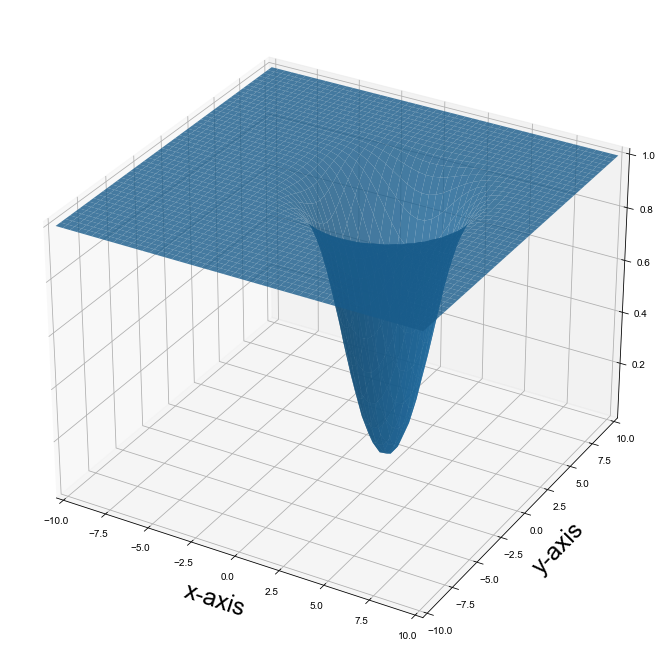

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.axis([-10,10,-10,10])
xr = np.linspace(-10, 10, 50)
yr = np.linspace(-10, 10, 50)
# create a 2 x Nx x Ny (Nx=Ny=50) array of grid points
xy = np.array(np.meshgrid(xr, yr))
ax.plot_surface(xy[0,:,:], xy[1,:,:], f(xy), alpha=0.8)
ax.set_xlabel('x-axis', size=24, labelpad=10)
ax.set_ylabel('y-axis', size=24, labelpad=10);

### Solution <a class="tocSkip"></a>
By trying the same method as before we see that with an initial guess of $(0,0)$ the method works, but starting at $(5,5)$ we get an error:

In [18]:
x0 = np.array([0., 0.])
xn, yn = newton_method(F, dFdx, x0)
print('Minimum found at:', xn[-1])

Minimum found at: [1.9999128 0.9999564]


In [19]:
x0 = np.array([5., 5.])
xn, yn = newton_method(F, dFdx, x0)
print('Minimum found at:', xn[-1])

LinAlgError: Matrix is singular.

To investigate what's going on we put some print statements in `newton_method`. Note that if the method fails it does not return the series of points `xn` that it has reached so far. So instead we simply print all inbetween estimates `x`:

In [20]:
def newton_method(F, jac, x_0, atol = 1.e-5, maxiter=100):
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        print(x)
        Fx = F(x)
        y_n.append(Fx)
        dFdx = jac(x)
        p = sl.solve(dFdx, -Fx)
        x = x + p
        if sl.norm(x - x_n[-1]) < atol:
            break
    
    return x_n, y_n

In [21]:
x0 = np.array([5., 5.])
xn, yn = newton_method(F, dFdx, x0)

[5. 5.]
[-17.41197387 -24.88263182]


LinAlgError: Matrix is singular.

So now we know the last point we have visited is $(-17.41197387, -24.88263182)$. The first and second derivative at this point are:

In [22]:
x = [-17.41197387, -24.88263182]
print(F(x))
print(dFdx(x))

[-0. -0.]
[[0. 0.]
 [0. 0.]]


So we see that the derivatives have gone completely to zero, in other words the function is completely flat. This corresponds to what we see when we plot the function. Going from $(5,5)$ to $(-17.41197387, -24.88263182)$ we seem to be diverging away from the minimum instead of converging to it. Once we are too far away, the function is completely flat and the Hessian becomes singular. If we use the line search method instead, the Newton iteration converges nicely. We copy `simple_line_search` and `newton_method_ls` from the lecture notes:

In [23]:
def simple_line_search(x, p, f, initial_slope, alpha=1e-4, max_search_iter=100):
    """Simple line search that halves lambda until the Armijo rule is satisfied
    
    x - initial point (at lambda=0)
    p - search direction, search is along x+lambda*p
    f - (callback) function to minimize
    initial_slope - derivative of f in x in p-direction"""
    lamda = 1.
    if initial_slope==0.0:
        return x, 1.0, 0
    for j in range(max_search_iter):
        xt = x + lamda*p
        # check Armijo rule:
        if f(xt) - f(x) <= alpha*lamda*initial_slope:
            break
        # uncomment to follow convergence of line search:
        # print(j,lamda,f(xt)-f(x), alpha*lamda*initial_slope)
        lamda /= 2.
    else:
        raise Exception("Line search did not converge")
    return xt, lamda, j

def newton_method_ls(F, jac, f, line_search, x_0, atol = 1.e-5, maxiter=100, verbose=False):
    "Newton method with line search"
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        Fx = F(x)
        y_n.append(Fx)
        # Newton update:
        if isinstance(Fx, float) or len(Fx)==1:
            p = -Fx/jac(x)
        else:
            p = sl.solve(jac(x), -Fx)
                
        x, lamda, reductions = line_search(x, p, f, np.dot(F(x), p))
        if verbose:
            print("In iteration {}, x={}; {} reductions were needed (lambda={})".format(i, x_n[-1], reductions, lamda))
        if sl.norm(x - x_n[-1]) < atol:
            break
    
    return x_n, y_n

Using these we obtain the desired result:

In [24]:
x0 = np.array([5., 5.])
xn, yn = newton_method_ls(F, dFdx, f, simple_line_search, x0)
print('Minimum found at: ', xn[-1])

Minimum found at:  [1.99994317 0.99992423]


* $f(x,y) = (1.5-x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 -x + xy^3)^2$
Again, we give you the code for the function itself, and its first and second derivative: $f'(x,y)=F(x,y)$ and $f''(x,y)=F'(x,y)$:

In [25]:
def f(X):
    x,y = X
    return (1.5-x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 -x + x*y**3)**2
    
def F(X):
    x, y = X
    dfdx = 2*(1.5-x+x*y)*(-1+y) + 2*(2.25-x+x*y**2)*(-1+y**2) + 2*(2.625 -x + x*y**3)*(-1+y**3)
    dfdy = 2*(1.5-x+x*y)*x + 4*(2.25-x+x*y**2)*x*y + 6*(2.625 - x + x*y**3)*x*y**2
    return np.array([dfdx, dfdy])

def dFdx(X):
    x, y = X
    dfdx2 = -2*(-1+y) + 2*(-1+y**2)**2 + 2*(-1+y**3)**2
    dfdxy = 2*x*(-1+y) + 2*(1.5-x+x*y) + 4*x*y*(-1+y**2) + 4*(2.25-x+x*y**2)*y + 6*x*y**2*(-1+y**3) + 6*(2.625-x+x*y**3)*y**2
    dfdy2 = 2*x**2 + 8*x**2*y**2 + 4*(2.25-x+x*y**2) + 18*x**2*y**4 + 12*(2.625 - x + x*y**3)*x*y
    return np.array([[dfdx2, dfdxy],[dfdxy, dfdy2]])

Try to use both the `newton_method` and `newton_method_ls` codes. Check whether the $(x,y)$ of the last iteration that these methods returns is indeed a local minimum by checking the values of the first derivative $f'(x, y)=F(x, y)$ and second derivative $f''(x,y) = F(x,y)$. What conditions on these should be true for $(x,y)$ to be a local minimum?

You will find that neither method work very well (or at all) for this problem. Can you figure out what is going wrong in the different cases you get using both methods and different initial guesses? **Hint:** look at the eigenvalues of the Hessian and check whether the Newton step direction ${\bf p}$ is actually a descent direction.

### Solution <a class="tocSkip"></a>
The result using `newton_method` and an initial guess of ${\bf x}_0=(0,0)$:

In [26]:
x0 = np.array([0, 0])
xn, yn = newton_method(F, dFdx, x0)
print('Last point returned: ', xn[-1])

[0 0]
[ 2.55 -0.85]
[ 3.69926591 -0.23904565]
[ 1.23772136 -0.50164304]
[ -6.45611026 -10.52695453]
[-5.53184744 -9.01758731]
[-4.73934573 -7.72255862]
[-4.0597541  -6.61087908]
[-3.47692883 -5.65584979]
[-2.97707897 -4.83438084]
[-2.54851258 -4.12635704]
[-2.18154236 -3.51399216]
[-1.86870748 -2.98105405]
[-1.60573163 -2.51168884]
[-1.39445936 -2.08813478]
[-1.25244084 -1.68508528]
[-1.25569829 -1.25054417]
[-1.94261075 -0.57323529]
[ 5.4904369 -1.6759558]
[ 5.12617081 -1.33520926]
[ 5.3185215 -0.9653067]
[ 8.55526121 -0.26979795]
[-1.88039029 -0.87139095]
[-14.90534139   2.59850164]
[-12.46424484   2.24799541]
[-10.31574609   1.95815585]
[-8.43520113  1.72343364]
[-6.82469082  1.53904368]
[-5.51304319  1.40055237]
[-4.54873353  1.30386129]
[-3.97958548  1.24558255]
[-3.76062959  1.22244104]
[-3.60733087  1.22489059]
[-3.41577628  1.23466532]
[-3.2064618   1.24698408]
[-2.97942884  1.26196925]
[-2.72892645  1.28074038]
[-2.44289502  1.30561883]
[-2.09086736  1.3423784 ]
[-1.53087513  

It result is the point $(x,y)=(0,1)$ (and it seems this is the case for various different initial guesses with this method). At first sight it looks like it's been succesful, as the derivative:

In [27]:
print("f'(x) = F(x) =", F([0,1]))

f'(x) = F(x) = [0. 0.]


is indeed 0 in that point. However this only means we have found a stationary point. Looking at the Hessian, and in particular at its eigenvalues:

In [28]:
print("f''(x)= F'(x) =", dFdx([0,1]))
print("its eigenvalues:", sl.eigvals(dFdx([0,1])))

f''(x)= F'(x) = [[ 0.   27.75]
 [27.75  9.  ]]
its eigenvalues: [-23.61249722+0.j  32.61249722+0.j]


however, we conclude that we have ended up at a saddle point.

The result using `newton_method_ls` is:

In [29]:
x0 = np.array([0., 0.])
xn, yn = newton_method_ls(F, dFdx, f, simple_line_search, x0)
print('Last point returned: ', xn[-1])
print('Derivative in this point: ', yn[-1])

Last point returned:  [ 1.275 -0.425]
Derivative in this point:  [-3.7685743 -1.690351 ]


In this case we end up at a point $(x,y)=(1.275,-0.425)$ that does not even have a zero derivative. We work out the step direction by solving:

$$
  f''(x,y) {\bf p} = -f'(x,y)
$$

In [30]:
p = sl.solve(dFdx(xn[-1]), -F(xn[-1]))

to check whether it is a descent direction, we take its inner product with the gradient:

In [31]:
print(np.dot(p, F(xn[-1])))

162.80130504705656


In other words the derivative in the search direction is actually positive! This means that the line search algorithm will never satisfy the sufficient decrease criterion and keeps on reducing $\lambda$ until it hits the maximum number of iterations. Let's check that by calling the `simple_line_search` routine:

In [32]:
x, lamda, reductions = simple_line_search(xn[-1], p, f, np.dot(F(xn[-1]), p))
print("Resulting position: ", x)
print("lambda: ", lamda)
print("reductions:", reductions)

Resulting position:  [ 1.275 -0.425]
lambda:  3.469446951953614e-18
reductions: 58


As expected $\lambda$ has been reduced to nearly zero, and the resulting position $(x,y)$ is approximately the same as before. (The line search does not actually reach the maximum number of iterations due to round off). This means in the next iteration we are still at the same location and the algorithm has stalled.

* Instead try to find the minimum of the last question using `minimize` from `scipy.optimize`:

```python
    import scipy.optimize as sop
    x0 = [0., 0.]
    result = sop.minimize(f, x0, jac=F, hess=dFdx, method='trust-ncg')
    print('Succesful: ', result['success'])
    print('N/o iterations: ', result['nit'])
    print('Minimum at: ', result['x'])
```

The `trust-ncg` method combines Newton-CG - Newton's method where the linear solve in the Newton update is solved using the Conjugate Gradient method - with a trust region method. How does this method overcome the problem encountered in the last question?

Instead of `trust-ncg` try the `newton-cg` method - this is Newton-CG with a simple line search. You may find that this version of Newton+line search is also succesful; The reason for that will be explained in lecture 9 in the section "Truncated Newton Method".

You can also try the `cg` method which is the nonlinear version of CG discussed at the end of lecture 3.

See [scipy's documentation of minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html), in particular also the notes at the bottom of that page, for more details on the various methods available.

### Solution <a class="tocSkip"></a>
The method works as expected:

In [33]:
import scipy.optimize as sop
x0 = [0., 0.]
result = sop.minimize(f, x0, jac=F, hess=dFdx, method='trust-ncg')
print('Succesful: ', result['success'])
print('N/o iterations: ', result['nit'])
print('Minimum at: ', result['x'])

Succesful:  True
N/o iterations:  22
Minimum at:  [2.99978748 0.4999473 ]


The reason for this is that when the method encounters a Hessian that is not SPD, and therefore Newton produces a search direction ${\bf p}$ that is *not* a descent direction, the trust region method effectively changes the Hessian, becoming closer to the identity matrix, until a sufficient decrease condition is satisfied.

As predicted, the `Newton-CG` is also succesful for reasons that will be explained in lecture 9.

In [34]:
import scipy.optimize as sop
x0 = [0., 0.]
result = sop.minimize(f, x0, jac=F, hess=dFdx, method='newton-cg')
print('Succesful: ', result['success'])
print('N/o iterations: ', result['nit'])
print('Minimum at: ', result['x'])

Succesful:  True
N/o iterations:  22
Minimum at:  [2.99997505 0.49999381]


Finally, we find that the simple nonlinear `cg` method is actually very effective for this problem:

In [35]:
import scipy.optimize as sop
x0 = [0., 0.]
result = sop.minimize(f, x0, method='cg')
print('Succesful: ', result['success'])
print('N/o iterations: ', result['nit'])
print('Minimum at: ', result['x'])

Succesful:  True
N/o iterations:  10
Minimum at:  [2.99998094 0.4999952 ]


* $$
  f(x, y) = \frac{\left(x^2 + (\gamma y)^2 -1\right)^2}{x^2 + (\gamma y)^2 - 1/h} - y,
$$

This is the example from today's lecture. The code for the function, and its first and second derivative can be found in the lecture notes. Like in the lecture notes, use $\gamma=0.5, h=10$ and an initial guess of ${\bf x}_0=(-0.5, -0.5)$.

### Solution <a class="tocSkip"></a>
We begin with the usual functions (copied from the lecture notes):

In [36]:
gamma = 5  # aspect ratio
h = 10.  # height of bump

def f(x):
    return (x[...,0]**2 + (gamma*x[...,1])**2 - 1)**2/(x[...,0]**2 + (gamma*x[...,1])**2 + 1/h) - x[...,1]


def dfdx(xy):
    x = xy[...,0]
    y = xy[...,1]
    ans = np.empty_like(xy)
    ans[...,0] = -2*x*(gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h)**2 + 4*x*(gamma**2*y**2 + x**2 - 1)/(gamma**2*y**2 + x**2 + 1/h)
    ans[...,1] = -2*gamma**2*y*(gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h)**2 + 4*gamma**2*y*(gamma**2*y**2 + x**2 - 1)/(gamma**2*y**2 + x**2 + 1/h) - 1
    return ans


def hess(xy):
    x = xy[...,0]
    y = xy[...,1]
    ans = np.empty(xy.shape+(xy.shape[-1],))
    ans[...,0,0] = 2*(2*gamma**2*y**2 + 4*x**2*(gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h)**2 - 8*x**2*(gamma**2*y**2 + x**2 - 1)/(gamma**2*y**2 + x**2 + 1/h) + 6*x**2 - (gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h) - 2)/(gamma**2*y**2 + x**2 + 1/h)
    ans[...,0,1] = 8*gamma**2*x*y*((gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h)**2 - 2*(gamma**2*y**2 + x**2 - 1)/(gamma**2*y**2 + x**2 + 1/h) + 1)/(gamma**2*y**2 + x**2 + 1/h)
    ans[...,1,0] = ans[...,0,1]
    ans[...,1,1] = 2*gamma**2*(4*gamma**2*y**2*(gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h)**2 - 8*gamma**2*y**2*(gamma**2*y**2 + x**2 - 1)/(gamma**2*y**2 + x**2 + 1/h) + 6*gamma**2*y**2 + 2*x**2 - (gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h) - 2)/(gamma**2*y**2 + x**2 + 1/h)
    return ans

As it turns out, for this problem with an initial guess of $(-0.5, -0.5)$ our simple implementation of pure Newton is succesful:

In [37]:
x0 = np.array([-0.5, -0.5])
xn, yn = newton_method(dfdx, hess, x0)
print('Last point returned: ', xn[-1])
print('Derivative in this point: ', yn[-1])

[-0.5 -0.5]
[-0.05258477 -0.03201334]
[0.45252824 0.27522069]
[0.2314363  0.16743526]
[0.30472374 0.19003447]
[ 3.99725942 -0.04088407]
[0.07307402 0.01934616]
[-0.07915509 -0.02117594]
[0.11884832 0.03156412]
[0.96684942 0.25645432]
[0.39857801 0.12977734]
[0.52041118 0.15708087]
[0.75254458 0.14393774]
[0.37245369 0.21694778]
[0.25067944 0.19652184]
[-0.22859564  0.22371069]
[-0.15203707  0.20064777]
[0.13237717 0.21194203]
[0.06967266 0.20513598]
[-0.0008066   0.20616274]
[-5.77870822e-05  2.05690124e-01]
[1.19083146e-08 2.05691374e-01]
Last point returned:  [1.19083146e-08 2.05691374e-01]
Derivative in this point:  [2.31576366e-09 5.20320285e-08]


But for some other initial guesses the method is not succesful (try for instance (0,0) and (1,1)). Our implementation of Newton with the simple line search does not fare any better:

In [38]:
x0 = np.array([-.5,  -.5])
xn, yn = newton_method_ls(dfdx, hess, f, simple_line_search, x0)
print('Last point returned: ', xn[-1])
print('Derivative in this point: ', yn[-1])

Last point returned:  [-0.11935006 -0.19397033]
Derivative in this point:  [ 0.02086787 -0.15212698]


The reason for this is, as before, that we hit locations where the Hessian is not SPD:

In [39]:
sl.eigvals(hess(xn[-1]))

array([-1.77442417e-01+0.j,  1.89679219e+02+0.j])

The `trust-ncg`, `newton-cg` and `cg` methods from `scipy.optimize.minimize` are all successful:

In [40]:
for x0 in [[-0.5, -0.5], [0,0], [1,1]]:
    for method in ['trust-ncg', 'newton-cg', 'cg']:
        print('Using {}, starting from x0={}'.format(method, x0))
        if method == 'cg':
            result = sop.minimize(f, x0, method=method)
        else:
            result = sop.minimize(f, x0, method=method, jac=dfdx, hess=hess)        
        print('Succesful:', result['success'])
        print('Minimum location:', result['x'])
        print('Number of iterations:', result['nit'])
        print()

Using trust-ncg, starting from x0=[-0.5, -0.5]
Succesful: True
Minimum location: [-7.30987748e-06  2.05691374e-01]
Number of iterations: 28

Using newton-cg, starting from x0=[-0.5, -0.5]
Succesful: True
Minimum location: [2.80646373e-07 2.05691374e-01]
Number of iterations: 87

Using cg, starting from x0=[-0.5, -0.5]
Succesful: True
Minimum location: [-1.27666492e-07  2.05691391e-01]
Number of iterations: 12

Using trust-ncg, starting from x0=[0, 0]
Succesful: True
Minimum location: [0.         0.20569137]
Number of iterations: 9

Using newton-cg, starting from x0=[0, 0]
Succesful: True
Minimum location: [0.         0.20569137]
Number of iterations: 5

Using cg, starting from x0=[0, 0]
Succesful: True
Minimum location: [3.67345254e-07 2.05691366e-01]
Number of iterations: 2

Using trust-ncg, starting from x0=[1, 1]
Succesful: True
Minimum location: [7.78421714e-08 2.05691665e-01]
Number of iterations: 16

Using newton-cg, starting from x0=[1, 1]
Succesful: True
Minimum location: [-2.1

Notice how `newton-cg` is struggling with the $(-0.5, -0.5)$ initial guess. And again nonlinear `cg` is remarkably effective.

# Solving over determined systems

## Population growth
Try to fit the exponential growth model
$$
  G(X) = C_1 \exp(C_2 X)
$$
for a number of different countries following the steps in the lecture notes. You can obtain 
the data for the years 1950-2022 from [this spreadsheet](https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_General/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx). Compute a measure for the quality of the exponential fit for these cases

### Solution <a class="tocSkip"></a>
We obtain the following data for the China and the US:

In [41]:
years = np.arange(1950, 2021)
china_pop = np.array([554419.269, 569909.108, 582576.497, 593365.882, 603052.316, 612241.552,
621363.233, 630677.648, 640295.777, 650212.731, 660408.054, 670952.701,
682102.654, 694339.084, 708254.602, 724218.97, 742414.887, 762581.176,
784074.715, 805985.941, 827601.385, 848759.709, 869485.962, 889485.368,
908464.206, 926240.889, 942685.412, 957891.271, 972205.441, 986132.214,
1000089.228, 1014022.211, 1027948.989, 1042431.401, 1058171.973, 1075589.363,
1095014.106, 1116095.475, 1137724.234, 1158357.393, 1176883.681, 1192897.277,
1206711.243, 1218817.059, 1230020.026, 1240920.539, 1251636.178, 1261996.017,
1271982.349, 1281514.833, 1290550.767, 1299129.747, 1307352.256, 1315303.522,
1323084.639, 1330776.38, 1338408.644, 1345993.891, 1353569.48, 1361169.41,
1368810.604, 1376497.633, 1384206.408, 1391883.335, 1399453.966, 1406847.868,
1414049.353, 1421021.794, 1427647.789, 1433783.692, 1439323.774
])
usa_pop = np.array([158804.397, 160872.264, 163266.026, 165909.996, 168736.39, 171685.337,
174705.006, 177751.477, 180788.387, 183786.249, 186720.57, 189569.85,
192313.747, 194932.4, 197408.497, 199733.679, 201895.76, 203905.081,
205805.756, 207659.274, 209513.34, 211384.079, 213269.805, 215178.797,
217114.898, 219081.25, 221086.427, 223135.659, 225223.307, 227339.321,
229476.36, 231636.065, 233821.851, 236030.236, 238256.849, 240499.822,
242763.137, 245052.78, 247372.258, 249725.809, 252120.309, 254539.371,
256990.608, 259532.13, 262241.204, 265163.741, 268335.008, 271713.634,
275175.309, 278548.148, 281710.914, 284607.992, 287279.312, 289815.567,
292354.663, 294993.509, 297758.977, 300608.425, 303486.022, 306307.565,
309011.469, 311584.051, 314043.885, 316400.539, 318673.422, 320878.312,
323015.992, 325084.758, 327096.263, 329064.917, 331002.647
])

Working out China in the same way as in the lecture notes (comparing full Newton and Newton-Gauss):

In [42]:
# use data defined in previous cell (rescaled)
X = (years-years[0])/(years[-1]-years[0])
Y = china_pop/china_pop[0]

def R(x):  # the residual function
    C1, C2 = x
    return C1*np.exp(C2*X) - Y

def dRdx(x):  # the first derivative of the residual
    C1, C2 = x
    # [:, np.newaxis] turns a flat rank-1 array of lenght m into a mx1 column array
    # with np.hstack we can stack those horizontally
    return np.hstack((np.exp(C2*X)[:,np.newaxis], (C1*X*np.exp(C2*X))[:,np.newaxis]))

def dRdx2(x):  # the second derivative of the residual
    C1, C2 = x
    m = len(X)
    # first we collect the 2x2=4 entries for each of the m data points
    # into a m x 4 array
    ans = np.hstack((
         np.zeros((m,1)),
         (X*np.exp(C2*X))[:,np.newaxis],
         (X*np.exp(C2*X))[:,np.newaxis],
         (C1*X**2*np.exp(C2*X))[:,np.newaxis]
    ))
    # then we reshape it to m x 2 x 2
    return ans.reshape((m, 2, 2))

Newton method
Succesful: True
Values for C1, C2: [1.171286   0.88845267]
Number of iterations: 9
Number of function, Jacobian and Hessian evaluations: 10, 9, 8

Gauss-Newton method
Succesful: True
Values for C1, C2: [1.17128572 0.88845305]
Number of iterations: 9
Number of function, Jacobian and Hessian evaluations: 10, 10, 9



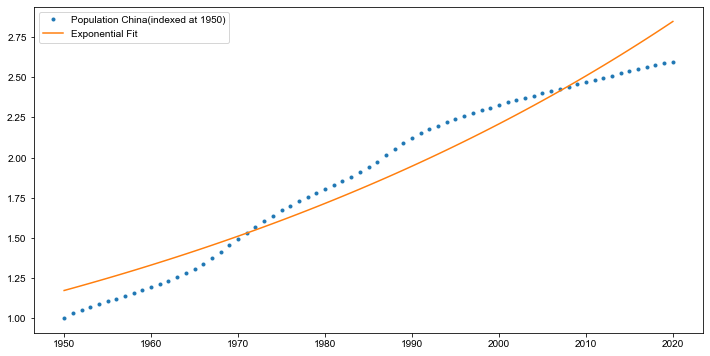

In [43]:
def f(x):  # the least squares fit that we're trying to minimize
    return 0.5 * np.sum(R(x)**2)


def F(x):  # this is the 1st derivative of f: F(x) = f'(x)
    return np.dot(R(x), dRdx(x))


def full_hessian(x):  # 2nd derivative (Hessian) of f
    Rprime = dRdx(x)
    return np.tensordot(Rprime, Rprime, axes=(0,0)) + np.tensordot(
            R(x), dRdx2(x), axes=(0,0))


def gn_hessian(x):  # approximation to the Hessian according to the Gauss-Newton method
    Rprime = dRdx(x)
    return np.tensordot(Rprime, Rprime, axes=(0,0))


x0 = [0, 0]
result = sop.minimize(f, x0, jac=F, hess=full_hessian, method='trust-ncg')
print("Newton method")
print("""Succesful: {success}
Values for C1, C2: {x}
Number of iterations: {nit}
Number of function, Jacobian and Hessian evaluations: {nfev}, {njev}, {nhev}
""".format(**result))

result = sop.minimize(f, x0, jac=F, hess=gn_hessian, method='trust-ncg')
print("Gauss-Newton method")
print("""Succesful: {success}
Values for C1, C2: {x}
Number of iterations: {nit}
Number of function, Jacobian and Hessian evaluations: {nfev}, {njev}, {nhev}
""".format(**result))

plt.figure(figsize=(12,6))
plt.plot(years, Y, '.', label='Population China(indexed at 1950)')
C1, C2 = result['x']
plt.plot(years, C1*np.exp(C2*X), label='Exponential Fit')
plt.legend();

Or, much simpler, using `least_squares` from scipy:

In [44]:
x0 = [0,0]
result = sop.least_squares(R, x0, jac=dRdx, method='lm')
print("Levenberg-Marquard (Trust Region Gauss-Newton)")
print("""Succesful: {success}
Values for C1, C2: {x}
Number of function and Jacobian evaluations: {nfev}, {njev}
""".format(**result))

Levenberg-Marquard (Trust Region Gauss-Newton)
Succesful: True
Values for C1, C2: [1.17128609 0.88845256]
Number of function and Jacobian evaluations: 8, 7



A measure for the quality of the exponential fit is found by computing the l2-norm for which we can re-use the `R` function:

$$
  \| R(x) \| = \| C_1 \exp(C_2{\bf X}) - {\bf Y}\|
$$

In [45]:
x = result['x']  # use result from the last solve
Rx = R(x)
print('L2-norm (normalized):', sl.norm(Rx))
print('L2-norm (absolute):', sl.norm(Rx)*china_pop[0])

L2-norm (normalized): 1.0480015878933535
L2-norm (absolute): 581032.2742706722


Note that above we have normalized `Y`: it is the the population of China divided by its population in 1950 (`china_pop[0]`). Therefore we have also provided the l2-norm of the mismatch in absolute numbers.

To do the same for the US (note that to use `least_squares` we only need to define `R` and `dRdx`):

Levenberg-Marquard (Trust Region Gauss-Newton)
Succesful: True
Values for C1, C2: [1.0645219  0.69831104]
Number of function and Jacobian evaluations: 6, 5

L2-norm (normalized): 0.19241900534052572
L2-norm (absolute): 30556.984114441966


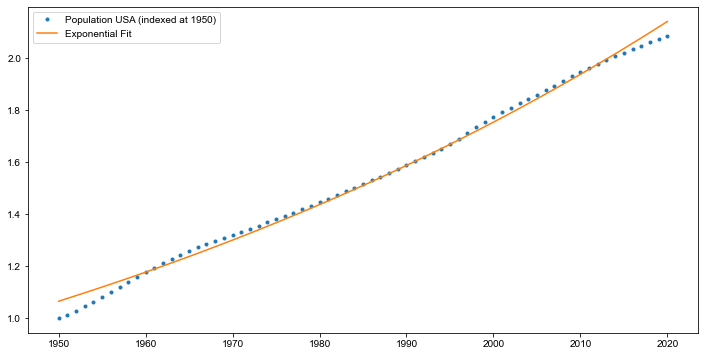

In [46]:
# use data defined in previous cell (rescaled)
X = (years-years[0])/(years[-1]-years[0])
Y = usa_pop/usa_pop[0]

def R(x):  # the residual function
    C1, C2 = x
    return C1*np.exp(C2*X) - Y

def dRdx(x):  # the first derivative of the residual
    C1, C2 = x
    # [:, np.newaxis] turns a flat rank-1 array of lenght m into a mx1 column array
    # with np.hstack we can stack those horizontally
    return np.hstack((np.exp(C2*X)[:,np.newaxis], (C1*X*np.exp(C2*X))[:,np.newaxis]))

x0 = [0,0]
result = sop.least_squares(R, x0, jac=dRdx, method='lm')
print("Levenberg-Marquard (Trust Region Gauss-Newton)")
print("""Succesful: {success}
Values for C1, C2: {x}
Number of function and Jacobian evaluations: {nfev}, {njev}
""".format(**result))

plt.figure(figsize=(12,6))
plt.plot(years, Y, '.', label='Population USA (indexed at 1950)')
C1, C2 = result['x']
plt.plot(years, C1*np.exp(C2*X), label='Exponential Fit')
plt.legend()

x = result['x']  # use result from the last solve
Rx = R(x)
print('L2-norm (normalized):', sl.norm(Rx))
print('L2-norm (absolute):', sl.norm(Rx)*usa_pop[0])

We find the US population to have a better fit with an exponetial growth model.

## Tidal Analysis
The tides around the world are ultimately caused by the periodic gravitational forcing of the Sun and the Moon. The two main frequencies (in radians/hour) are given by:

$$
  \omega_1 = 2\pi / 12.4206, \quad
  \omega_2 = 2\pi / 12.0
$$

which are derived from the time difference between the highest daily point of the Moon, and the point at which it is exactly at the opposite side of the Earth, and similarly the time difference between midday and midnight for the Sun.

A good approximation for the tide at a given location is then of the form:

$$
  h(t) = A_1 \cos(\omega_1 t + \alpha_1) + A_2 \cos(\omega_2 t + \alpha_2) + h_0
$$

where $A_1$ and $A_2$ are the amplitudes, and $\alpha_1$ and $\alpha_2$ are the phases of the two tidal constituents. $h_0$ is the mean water level.

1. Using $A_1=1.0, A_2=0.2, \alpha_1=0., \alpha_2=0.5, h_0=0$ plot the tide for two days, and for a month (31\*24 hours) Next to the twice-daily tide, what do you observe? Try to relate this phenomenom with the difference in frequencies, and its associated time scale $2\pi/(\omega_1 - \omega_2)$

### Solution <a class="tocSkip"></a>

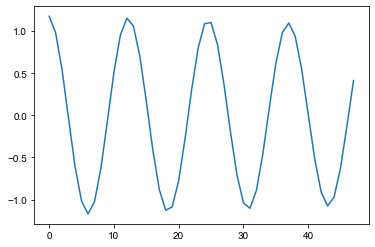

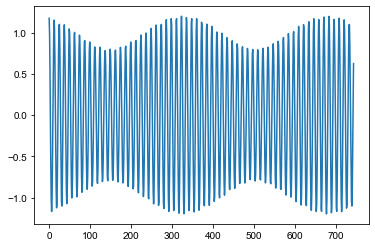

In [47]:
omega1 = 2*np.pi /12.4206
omega2 = 2*np.pi /12.

A1 = 1
A2 = 0.2
alpha1 = 0.
alpha2 = 0.5
h0 = 0

t = np.arange(2*24)
plt.plot(t, A1*np.cos(omega1*t+alpha1) + A2*np.cos(omega2*t+alpha2) + h0)

plt.figure()
t = np.arange(31*24)
plt.plot(t, A1*np.cos(omega1*t+alpha1) + A2*np.cos(omega2*t+alpha2) + h0)

Observation: The amplitude of the twice-daily tide seems to fluctuate between neap (lowest amplitude) and spring tide (highest amplitude). The time period between two subsequent springs, or two subsequent neaps is given by:

In [48]:
T = 2*np.pi/(omega2-omega1)
print('{} hours, or {} days'.format(T, T/24.))

354.3680456490732 hours, or 14.765335235378052 days


This is due to the two components of the tide being in phase (spring) and anti-phase (neap).

2. You the water elevations from a tidal gauge located in [Ketchikan, Alaska](https://en.wikipedia.org/wiki/Ketchikan,_Alaska). These are given in the 'ketchikan1919.dat' file which contains a year-long hourly record, starting at midnight 1-1-1919, of tidal elevations in meters. We try to match these measurements with the two-component tide formula given above, where we need to invert for the amplitudes and the phases and the mean water level. After the optimisation compute the l2-norm error between the nonlinear regression and the measurements. Also compute an average absolute error:

$$
  \frac{\sum_{i=1}^n |h(X_i) - Y_i|}{n}
$$

**Hint:** The vector ${\bf x}$ we optimize for should be a 5-vector containing the 5 parameters:

$$
  {\bf x} = (A_1, A_2, \alpha_1, \alpha_2, h_0)
$$

The vector ${\bf X}$ is the vector of measurement times, and the vector $Y$ the measured water levels. We therefore need a residual function:

$$
  R({\bf x}) = \text{tide}({\bf x}, X) - {\bf Y},
$$

where $\text{tide}({\bf x}, X)$ is a function that for the given parameter ${\bf x}$ returns the tidal levels at times ${\bf X}$.

We use the `least_squares` routine from `scipy.optimize`. You can use the below layout for your code:

In [ ]:
Y = np.loadtxt('ketchikan1919.dat')  # observations from 'ketchikan1919.dat' file
# The measurement times. The observations are hourly
# starting from 1919-1-1 0:0:0 GMT which we choose as t=0
# The vector of times X (in hours) is then simply 0, 1, 2, ...
X = np.arange(len(Y))

# tidal frequencies
omega1 = 2*np.pi/12.4206
omega2 = 2*np.pi/12.

def tide(x, X):
    A1, A2 = x[0:2]
    alpha1, alpha2 = x[2:-1]
    h0 = x[-1]
    return ...

def R(x):
    return tide(x, X) - Y

def dRdx(x):
    A1, A2 = x[0:2]
    alpha1, alpha2 = x[2:-1]
    h0 = x[-1]
    derivatives = []
    
    derivatives.append(...)  # derivative wrt A1
    derivatives.append(...)  # derivative wrt A2
    derivatives.append(...)  # derivative wrt alpha1
    derivatives.append(...)  # derivative wrt alpha2
    derivatives.append(...)  # derivative wrt h0
    
    # NOTE: least_squares expects dRdx to return a n x m array
    # where n is the length of X
    # and m is the lenght of x (the number of derivatives)
    # therefore we need a transpose:
    return np.array(derivatives).T

In [ ]:
x0 = [0,0,0,0,0]
result = sop.least_squares(R, x0, jac=dRdx, method='lm')
print('Succesful:', result['success'])
x = result['x']
A1, A2, alpha1, alpha2, h0 = x
print("amplitudes A1, A2 =", A1, A2)
print("phases alpha1, alpha2 =", alpha1, alpha2)
print("mean water level h0 = ", h0)

In [ ]:
plt.figure(figsize=(12,4))
# plotting first 20 days=480 hours:
plt.plot(tide(x, X[:480]), label='reconstruction')
plt.plot(Y[:480], label='measurements')
plt.legend()

### Solution <a class="tocSkip"></a>
Filling in the dots:

In [113]:
Y = np.loadtxt('ketchikan1919.dat')  # observations from 'ketchikan1919.dat' file
# The measurement times. The observations are hourly
# starting from 1932-1-1 0:0:0 GMT which we choose as t=0
# The vector of times X (in hours) is then simply 0, 1, 2, ...
X = np.arange(len(Y))

# tidal frequencies
omega1 = 2*np.pi/12.4206
omega2 = 2*np.pi/12.

def tide(x, X):
    A1, A2 = x[0:2]
    alpha1, alpha2 = x[2:-1]
    h0 = x[-1]
    return A1*np.cos(omega1*X + alpha1) + A2*np.cos(omega2*X + alpha2) + h0

def R(x):
    return tide(x, X) - Y

def dRdx(x):
    A1, A2 = x[0:2]
    alpha1, alpha2 = x[2:-1]
    h0 = x[-1]
    derivatives = []
    
    derivatives.append(np.cos(omega1*X + alpha1))  # derivative wrt A1
    derivatives.append(np.cos(omega2*X + alpha2))  # derivative wrt A2
    derivatives.append(-A1*np.sin(omega1*X + alpha1))  # derivative wrt alpha1
    derivatives.append(-A2*np.sin(omega2*X + alpha2))  # derivative wrt alpha2
    derivatives.append(np.ones(len(X)))  # derivative wrt h0
    
    # NOTE: least_squares expects dRdx to return a n x m array
    # where n is the length of X
    # and m is the lenght of x (the number of derivatives)
    # therefore we need a transpose:
    return np.array(derivatives).T

In [114]:
x0 = [0,0,0,0,0]
result = sop.least_squares(R, x0, jac=dRdx, method='lm')
print('Succesful:', result['success'])
x = result['x']
A1, A2, alpha1, alpha2, h0 = x
print("amplitudes A1, A2 =", A1, A2)
print("phases alpha1, alpha2 =", alpha1, alpha2)
print("mean water level h0 = ", h0)

Succesful: True
amplitudes A1, A2 = -1.9125870159827416 0.6257100297806956
phases alpha1, alpha2 = -1.1362760061663775 1.0052159721791298
mean water level h0 =  2.472624015862212


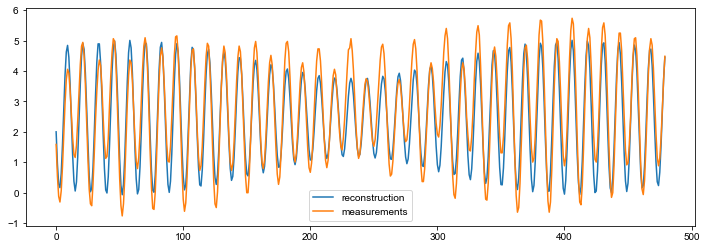

In [115]:
plt.figure(figsize=(12,4))
plt.plot(tide(x, X[:480]), label='reconstruction')
plt.plot(Y[:480], label='measurements')
plt.legend();

We were also asked for the l2-norm error of the nonlinear regression, and the percentage absolute error:

In [116]:
print("l2-error: ", sl.norm(R(x)))
print("Average absolute error:", np.sum(np.abs(R(x)))/len(Y))

l2-error:  50.9825152847232
Average absolute error: 0.44391203174383687


3. You are also given the predictions by [NOAA](https://tidesandcurrents.noaa.gov/) of the tide at Ketchikan for the month April 2022. Use the parameters from question 2. to make your own prediction of the tide for this month and compare with that of NOAA. You can read the prediction by NOAA using:
```python
Y_mar2020 = np.loadtxt('ketchikan_apr2022.dat')
```
Again these predictions are hourly but now starting at 1 April 2022 0:0:0 GMT. Since in our nonlinear regression in the previous question we used 1 Jan 1919 0:0:0 as our t=0 point, we need to add the number of hours between these two dates as our starting point. Again compute an l2-norm error and the average absolute error. You can use the following code:

In [ ]:
import datetime
td = datetime.datetime(2022,4,1)-datetime.datetime(1919,1,1)
X_apr2020 = np.arange(len(Y_apr2022)) + td.total_seconds()/3600.
plt.figure(figsize=(12,4))
plt.plot(X_apr2020, Y_apr2020, label='NOAA')
plt.plot(X_apr2020, tide(x, X_apr2020), label='my prediction')

### Solution <a class="tocSkip"></a>

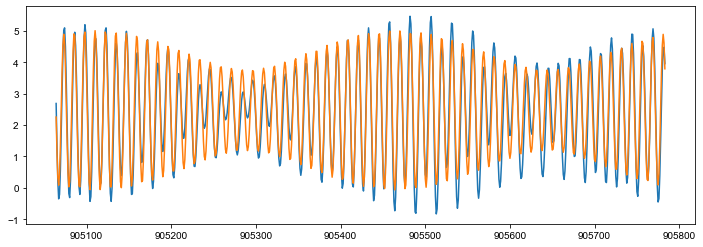

In [117]:
Y_apr2022 = np.loadtxt('ketchikan_apr2022.dat')
import datetime
td = datetime.datetime(2022,4,1)-datetime.datetime(1919,1,1)
X_apr2022 = np.arange(len(Y_apr2022)) + td.total_seconds()/3600.
plt.figure(figsize=(12,4))
plt.plot(X_apr2022, Y_apr2022, label='NOAA')
plt.plot(X_apr2022, tide(x, X_apr2022), label='my prediction');

The errors:

In [118]:
R_apr2022 = tide(x, X_apr2022) - Y_apr2022
print("l2-error: ", sl.norm(R_apr2022))
print("Average absolute error:", np.sum(np.abs(R_apr2022))/len(X_apr2022))

l2-error:  13.718535677277083
Average absolute error: 0.41625517632835485


* If you look closely at the measured tide levels from 1919 and the prediction of NOAA, you can see there is an alternating pattern between the two subsequent peaks in a day, where one peak is much lower than the other one. It seems that we are missing this pattern in our predictions. This is because we are still missing two important constituents of the tide: the so called N2 tide with a period of $12.658348$ hours, and the K1 tide with a period of $23.934469$ hours. Note that the second of these has a period of nearly a day (a so called diurnal tide) which precisely gives this alternating pattern. Thus we have to add the following two frequencies:

In [ ]:
omega3 = 2*np.pi/12.658348
omega4 = 2*np.pi/23.934469

and now fit to the following function

$$
  h(t) = A_1 \cos(\omega_1 t + \alpha_1) + A_2 \cos(\omega_2 t + \alpha_2) 
  A_3 \cos(\omega_3 t + \alpha_3) + A_4 \cos(\omega_4 t + \alpha_4)+ h_0
$$

where now we have to invert for 9 parameters:

$$
  {\bf x} = (A_1, A_2, A_3, A_4, \alpha_1, \alpha_2, \alpha_3, \alpha_4, h_0)
$$

Repeat the steps of the previous two (sub)-questions, adapting the functions `tide(x,X)` and `dRdx(x)`, and see if you can improve the prediction.

### Solution <a class="tocSkip"></a>
We adapt the functions:

In [119]:
Y = np.loadtxt('ketchikan1919.dat')  # observations from 'ketchikan1919.dat' file
# The measurement times. The observations are hourly
# starting from 1932-1-1 0:0:0 GMT which we choose as t=0
# The vector of times X (in hours) is then simply 0, 1, 2, ...
X = np.arange(len(Y))

# tidal frequencies
omega1 = 2*np.pi/12.420613
omega2 = 2*np.pi/12.
omega3 = 2*np.pi/12.658348
omega4 = 2*np.pi/23.934469

def tide(x, X):
    A = x[0:4]
    alpha = x[4:-1]
    h0 = x[-1]
    return (A[0]*np.cos(omega1*X + alpha[0]) + A[1]*np.cos(omega2*X + alpha[1]) + 
            A[2]*np.cos(omega3*X + alpha[2]) + A[3]*np.cos(omega4*X + alpha[3]) + h0)

def R(x):
    return tide(x, X) - Y

def dRdx(x):
    A = x[0:4]
    alpha = x[4:-1]
    h0 = x[-1]
    derivatives = []
    
    derivatives.append(np.cos(omega1*X + alpha[0]))  # derivative wrt A1
    derivatives.append(np.cos(omega2*X + alpha[1]))  # derivative wrt A2
    derivatives.append(np.cos(omega3*X + alpha[2]))  # derivative wrt A3
    derivatives.append(np.cos(omega4*X + alpha[3]))  # derivative wrt A4
    derivatives.append(-A[0]*np.sin(omega1*X + alpha[0]))  # derivative wrt alpha1
    derivatives.append(-A[1]*np.sin(omega2*X + alpha[1]))  # derivative wrt alpha2
    derivatives.append(-A[2]*np.sin(omega3*X + alpha[2]))  # derivative wrt alpha3
    derivatives.append(-A[3]*np.sin(omega4*X + alpha[3]))  # derivative wrt alpha4
    derivatives.append(np.ones(len(X)))  # derivative wrt h0
    
    # NOTE: least_squares expects dRdx to return a n x m array
    # where n is the length of X
    # and m is the lenght of x (the number of derivatives)
    # therefore we need a transpose:
    return np.array(derivatives).T

In [120]:
x0 = [0] * 9
result = sop.least_squares(R, x0, jac=dRdx, method='lm')
print('Succesful:', result['success'])
x = result['x']
print("amplitudes A =", x[0:4])
print("phases alpha =", x[4:-1])
print("mean water level h0 = ", x[-1])

Succesful: True
amplitudes A = [-1.9133807   0.6254768   0.37997071 -0.48323738]
phases alpha = [-1.13715224  1.00493932  4.5135225  -1.10559525]
mean water level h0 =  2.4726280087658674


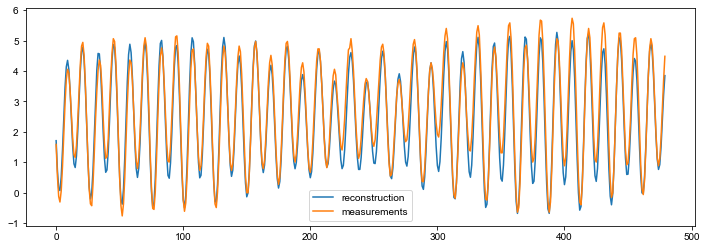

In [121]:
plt.figure(figsize=(12,4))
plt.plot(tide(x, X[:480]), label='reconstruction')
plt.plot(Y[:480], label='measurements')
plt.legend();

This indeed looks better, which is confirmed by computing the error:

In [108]:
print("l2-error: ", sl.norm(R(x)))
print("Average absolute error:", np.sum(np.abs(R(x)))/len(Y))

l2-error:  30.724611306876913
Average absolute error: 0.26184917257435186


Now we repeat the prediction for April 2022:

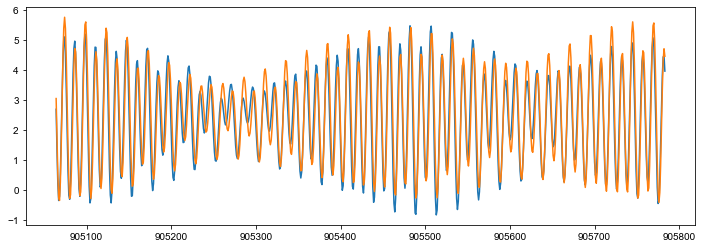

In [110]:
Y_apr2022 = np.loadtxt('ketchikan_apr2022.dat')
import datetime
td = datetime.datetime(2022,4,1)-datetime.datetime(1919,1,1)
X_apr2022 = np.arange(len(Y_apr2022)) + td.total_seconds()/3600.
plt.figure(figsize=(12,4))
plt.plot(X_apr2022, Y_apr2022, label='NOAA')
plt.plot(X_apr2022, tide(x, X_apr2022), label='my prediction');

Which again looks a lot better, with errors:

In [104]:
print("l2-error: ", sl.norm(R(x)))
print("Average absolute error:", np.sum(np.abs(R(x)))/len(Y))

4.3